In [1]:
# Import libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import re


# Load the dataset
df = pd.read_csv('2019-11-13-11-57_2331.csv')
df.head()

,Timestamp,STATION_1:Freq,STATION_1:Va:Magnitude,STATION_1:Va:Angle,STATION_1:Vb:Magnitude,STATION_1:Vb:Angle,STATION_1:Vc:Magnitude,STATION_1:Vc:Angle,STATION_1:SlewRate,STATION_1:OFDetect,STATION_1:UFDetect,STATION_1:Slew50,STATION_1:Slew100,STATION_1:Slew200,STATION_1:OFSlew,STATION_1:UFSlew,STATION_1:DF/DT
0,2019/11/13 11:52:49.467,60.00009,121.31514,121.84017,121.92584,1.734281,121.43974,-118.45382,0.000078,0,0,0.001449173,0.001153005,0.0007983182,0,0,0.00819
1,2019/11/13 11:52:49.483,60.00009,121.31514,121.84017,121.92584,1.734281,121.43974,-118.45382,0.000110,0,0,0.001553219,0.001184502,0.0008279819,0,0,0.00819
2,2019/11/13 11:52:49.499,59.99945,121.30986,121.83616,121.91555,1.729726,121.43974,-118.45382,0.000126,0,0,0.001657264,0.00123889,0.0008233126,0,0,-0.00116
3,2019/11/13 11:52:49.515,59.99945,121.30986,121.83616,121.91555,1.729726,121.43974,-118.45382,0.000108,0,0,0.00155212,0.001311407,0.0008186433,0,0,-0.00116
4,2019/11/13 11:52:49.531,59.99818,121.31104,121.81914,121.91435,1.710936,121.42767,-118.47300,0.000100,0,0,0.001538565,0.001342904,0.000813974,0,0,-0.00639


In [2]:
# Checking the missing value
df.isna().sum()


# Selecting the target
y = df.iloc[:, 1]
y.head()


# Selecting the features
X = df.iloc[:,2:9]
X['STATION_1:DF/DT'] = df.iloc[:,-1]
X.head()


# There is a wrong data type
# Checking the dtype
X.info()

# DF/DT columns is set as a object
# Convert it into float
X['STATION_1:DF/DT'] = X['STATION_1:DF/DT'].astype('float64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STATION_1:Va:Magnitude  18000 non-null  float64
 1   STATION_1:Va:Angle      18000 non-null  float64
 2   STATION_1:Vb:Magnitude  18000 non-null  float64
 3   STATION_1:Vb:Angle      18000 non-null  float64
 4   STATION_1:Vc:Magnitude  18000 non-null  float64
 5   STATION_1:Vc:Angle      18000 non-null  float64
 6   STATION_1:SlewRate      18000 non-null  float64
 7   STATION_1:DF/DT         18000 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [3]:
# Standardize the X
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale = pd.DataFrame(X_scale, columns=X.columns)
X_scale.head()

,STATION_1:Va:Magnitude,STATION_1:Va:Angle,STATION_1:Vb:Magnitude,STATION_1:Vb:Angle,STATION_1:Vc:Magnitude,STATION_1:Vc:Angle,STATION_1:SlewRate,STATION_1:DF/DT
0,0.021039,0.674738,0.083552,0.424413,0.059907,-0.717325,0.122640,0.399775
1,0.021039,0.674738,0.083552,0.424413,0.059907,-0.717325,0.155912,0.399775
2,-0.030982,0.674685,-0.015653,0.424346,0.059907,-0.717325,0.172971,-0.056536
3,-0.030982,0.674685,-0.015653,0.424346,0.059907,-0.717325,0.154041,-0.056536
4,-0.019356,0.674463,-0.027222,0.424067,-0.055717,-0.717478,0.145043,-0.311778


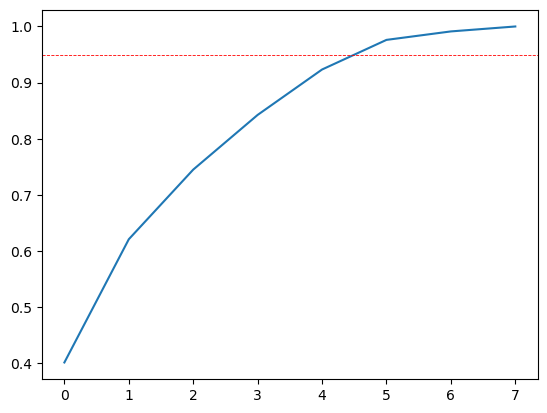

In [4]:
# Performing PCA
model = PCA()
model.fit(X_scale)


# Calculating the ideal number of components
explained_var_ratio = model.explained_variance_ratio_
cumsum = np.cumsum(explained_var_ratio)
plt.plot(cumsum)
plt.axhline(y=0.95, color='r', linestyle='--', linewidth=0.6)
plt.show()

In [5]:
# Calculating the ideal number of components for PCA
n_comp = np.argmax(cumsum>0.95)
n_comp

5

In [6]:
# Doing PCA with 5 Components
pca = PCA(n_components=n_comp)
pca.fit(X_scale)


# Previewing the PCA Components
pcomp = pca.components_
pcomp_df = pd.DataFrame(pcomp.T, index=X.columns, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pcomp_df

,PC1,PC2,PC3,PC4,PC5
STATION_1:Va:Magnitude,-0.516114,-0.185830,0.029560,0.170378,-0.094463
STATION_1:Va:Angle,-0.282680,0.338256,0.032688,-0.731170,-0.277605
STATION_1:Vb:Magnitude,-0.519880,-0.138720,0.025358,0.076475,-0.044397
STATION_1:Vb:Angle,-0.196702,0.505032,-0.051209,0.307219,0.659261
STATION_1:Vc:Magnitude,-0.499436,-0.223882,0.014123,0.238797,-0.157295
STATION_1:Vc:Angle,0.285290,-0.507539,0.011616,0.148035,-0.088016
STATION_1:SlewRate,-0.110449,-0.512561,0.089802,-0.501840,0.666955
STATION_1:DF/DT,-0.041549,-0.079445,-0.993173,-0.073131,0.009965


In [7]:
# Previewing the eigenvalues
eigenvalue = pca.explained_variance_
eigenvalue = pd.DataFrame(eigenvalue, index=pcomp_df.columns, columns=['Eigen Values'])
eigenvalue

,Eigen Values
PC1,3.210407
PC2,1.756881
PC3,0.992671
PC4,0.779703
PC5,0.647325


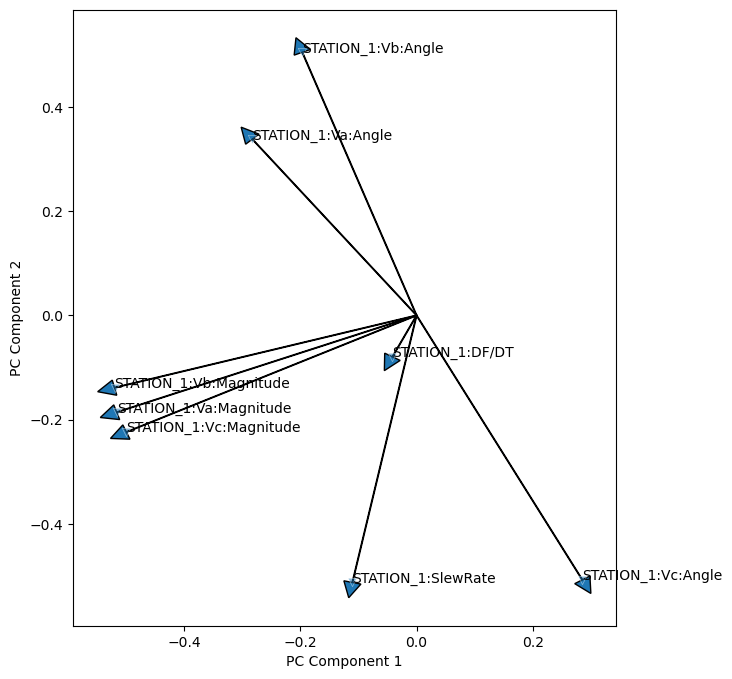

In [8]:
# Creating PCA Feature
pca_feature = pca.transform(X_scale)
pca_feature = pd.DataFrame(pca_feature, columns=['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5'])
pca_feature.head()
features = X_scale.columns

# Ploting two most important feature in a scatterplot
fig = plt.figure(figsize=(7,8))
for i, feature in enumerate(features):
    plt.arrow(0,0,
             pcomp[0,i],
             pcomp[1,i],
             head_width=0.03,
             head_length=0.03)
    plt.text(pcomp[0,i],
            pcomp[1,i], feature,
            fontsize=10)
sns.scatterplot(x=pcomp_df.iloc[:,0], y=pcomp_df.iloc[:,1], alpha=0.5, marker='v')
plt.xlabel('PC Component 1')
plt.ylabel('PC Component 2')
plt.show()

/home/septian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/septian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/septian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/septian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before

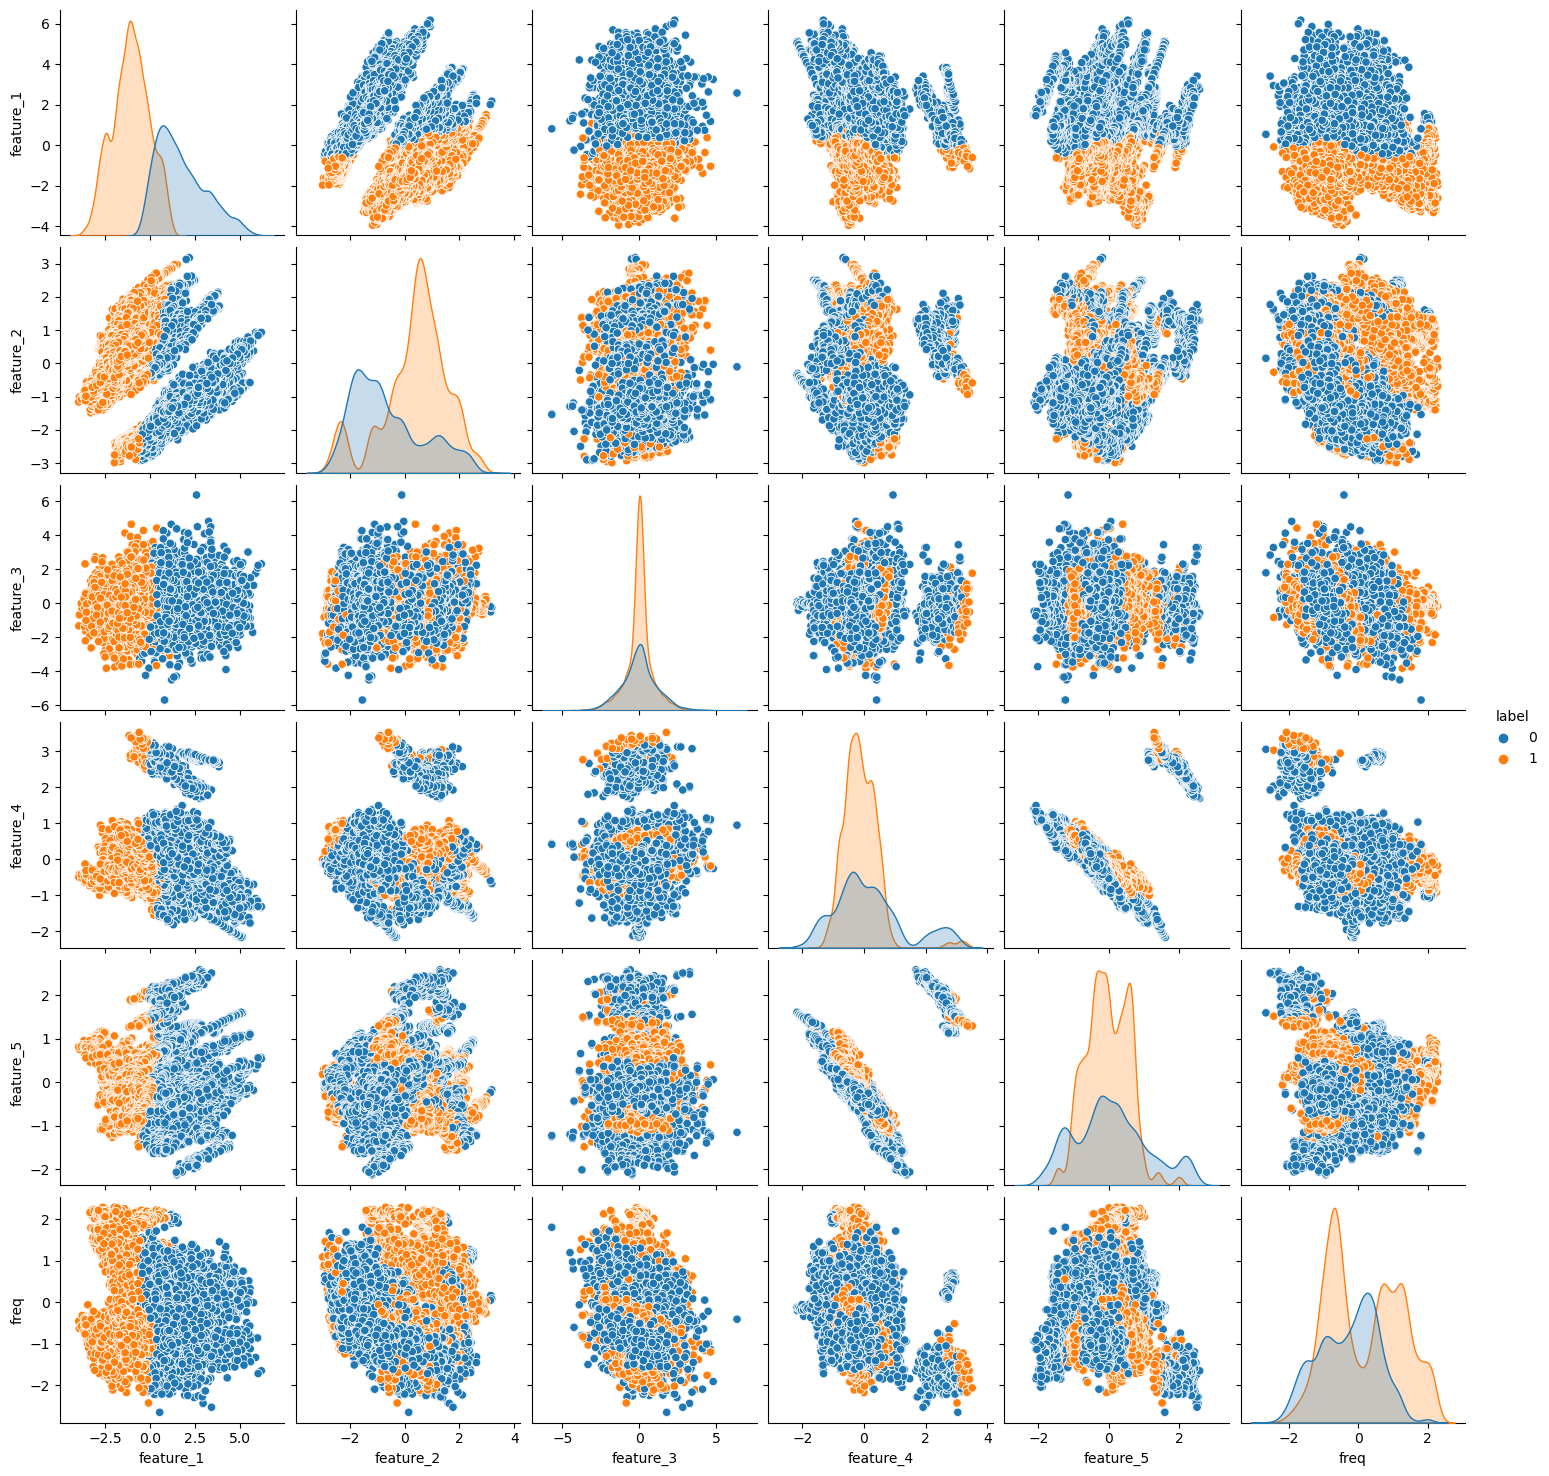

In [9]:
# Adding target to pca feature dataframe
pca_feature['freq'] = scaler.fit_transform(np.array(y).reshape(-1,1))

# Labeling the data using KMeans
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2)
kmeans.fit(pca_feature.iloc[:,0:5])
label = kmeans.predict(pca_feature.iloc[:, 0:5])

pca_feature['label'] = label
sns.pairplot(data=pca_feature, hue='label')
plt.savefig('Pair_Grid_of_PCA_Feature_and_Target.png')